In [33]:
import pandas as pd
import numpy as np

# Function to determine the best action using basic strategy + Zen Count
def basic_blackjack_strategy(player_total, dealer_card, has_ace, zen_count):
    """
    Returns the optimal decision based on basic Blackjack strategy + Zen Count influence.
    """
    if player_total >= 17:
        return 0  # Stand on 17+
    if player_total <= 11:
        return 1  # Hit on 11 or less
    if player_total == 12:
        return 0 if dealer_card in [4, 5, 6] else 1  # Stand if dealer has weak hand
    if player_total in [13, 14, 15, 16]:
        return 0 if dealer_card in [2, 3, 4, 5, 6] else 1  # Stand on weak dealer
    # Zen Count adjustments: If count is high, favor Stand
    if zen_count > 3 and player_total >= 15:
        return 0  # Stand with a strong count
    return 1  # Default Hit

data = []

# Expand game scenarios by generating more random hands
for _ in range(50000):  
    player_total = np.random.randint(4, 22)  
    dealer_card = np.random.randint(1, 11)  
    has_ace = np.random.choice([0, 1])  
    zen_count = np.random.randint(-10, 11)  

    base_prob_win = np.random.uniform(0.2, 0.7)
    base_prob_loss = np.random.uniform(0.3, 0.8)

    # Adjust probabilities based on game conditions
    prob_win = base_prob_win + (zen_count * 0.02)  # Higher Zen count increases win rate slightly
    prob_loss = base_prob_loss - (zen_count * 0.02)  # Lower Zen count reduces loss rate

    prob_draw = 1 - (prob_win + prob_loss)  
    prob_win = max(0.1, min(0.9, prob_win))
    prob_loss = max(0.1, min(0.9, prob_loss))
    prob_draw = max(0.0, min(0.2, prob_draw))

    decision = basic_blackjack_strategy(player_total, dealer_card, has_ace, zen_count)
    data.append([player_total, dealer_card, has_ace, zen_count, prob_win, prob_loss, prob_draw, decision])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Player_Total", "Dealer_Card", "Has_Ace", "Zen_Count", "Prob_Win", "Prob_Loss", "Prob_Draw", "Decision"])

hit_count = df[df["Decision"] == 1].shape[0]
stand_count = df[df["Decision"] == 0].shape[0]

print(f"📊 Hit Count: {hit_count}, Stand Count: {stand_count}")

df.to_csv("blackjack_training_dataset.csv", index=False)

print("✅ Dataset created:")
print(df.head())

📊 Hit Count: 29778, Stand Count: 20222
✅ Dataset created:
   Player_Total  Dealer_Card  Has_Ace  Zen_Count  Prob_Win  Prob_Loss  \
0            16            9        1         -4  0.335811   0.825675   
1            17            7        0         -4  0.211944   0.511189   
2             9            3        0          8  0.728819   0.263630   
3            13            3        1         -4  0.307993   0.765070   
4            14            2        0         -9  0.100000   0.895695   

   Prob_Draw  Decision  
0   0.000000         1  
1   0.200000         0  
2   0.007551         1  
3   0.000000         0  
4   0.068991         0  


In [34]:
import pandas as pd
df = pd.read_csv("/Users/borjacervera/Documents/Ironhack/VS_Code/personal_pruebas/blackjack_training_dataset.csv")

# Display the first rows
print("📌 **First rows of the dataset:**")
print(df.head())

📌 **First rows of the dataset:**
   Player_Total  Dealer_Card  Has_Ace  Zen_Count  Prob_Win  Prob_Loss  \
0            16            9        1         -4  0.335811   0.825675   
1            17            7        0         -4  0.211944   0.511189   
2             9            3        0          8  0.728819   0.263630   
3            13            3        1         -4  0.307993   0.765070   
4            14            2        0         -9  0.100000   0.895695   

   Prob_Draw  Decision  
0   0.000000         1  
1   0.200000         0  
2   0.007551         1  
3   0.000000         0  
4   0.068991         0  


In [35]:
# Display general information about the dataset
print("\n📊 **Dataset information:**")
print(df.info())


📊 **Dataset information:**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player_Total  50000 non-null  int64  
 1   Dealer_Card   50000 non-null  int64  
 2   Has_Ace       50000 non-null  int64  
 3   Zen_Count     50000 non-null  int64  
 4   Prob_Win      50000 non-null  float64
 5   Prob_Loss     50000 non-null  float64
 6   Prob_Draw     50000 non-null  float64
 7   Decision      50000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 3.1 MB
None


In [36]:
# Show statistical description of the dataset
print("\n📈 **Dataset statistics:**")
print(df.describe())


📈 **Dataset statistics:**
       Player_Total   Dealer_Card       Has_Ace     Zen_Count      Prob_Win  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean      12.475160      5.505800      0.498420     -0.044040      0.449805   
std        5.177756      2.885594      0.500003      6.065736      0.186201   
min        4.000000      1.000000      0.000000    -10.000000      0.100000   
25%        8.000000      3.000000      0.000000     -5.000000      0.313317   
50%       12.000000      6.000000      0.000000      0.000000      0.448358   
75%       17.000000      8.000000      1.000000      5.000000      0.585176   
max       21.000000     10.000000      1.000000     10.000000      0.899734   

          Prob_Loss     Prob_Draw      Decision  
count  50000.000000  50000.000000  50000.000000  
mean       0.548774      0.065879      0.595560  
std        0.186420      0.081805      0.490788  
min        0.100020      0.000000      0.000000  
25%        

In [37]:
# Check decision distribution (0 = Stand, 1 = Hit)
decision_counts = df["Decision"].value_counts()
decision_percentages = df["Decision"].value_counts(normalize=True) * 100

print("\n📌 **Decision distribution in the dataset:**")
print(decision_counts)

print("\n📊 **Decision percentages:**")
print(decision_percentages)


📌 **Decision distribution in the dataset:**
Decision
1    29778
0    20222
Name: count, dtype: int64

📊 **Decision percentages:**
Decision
1    59.556
0    40.444
Name: proportion, dtype: float64


/var/folders/9b/1k3cjn9x4cg_w6793ryzh2hw0000gn/T/ipykernel_8870/3631369005.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decision_counts.index, y=decision_counts.values, palette="coolwarm")


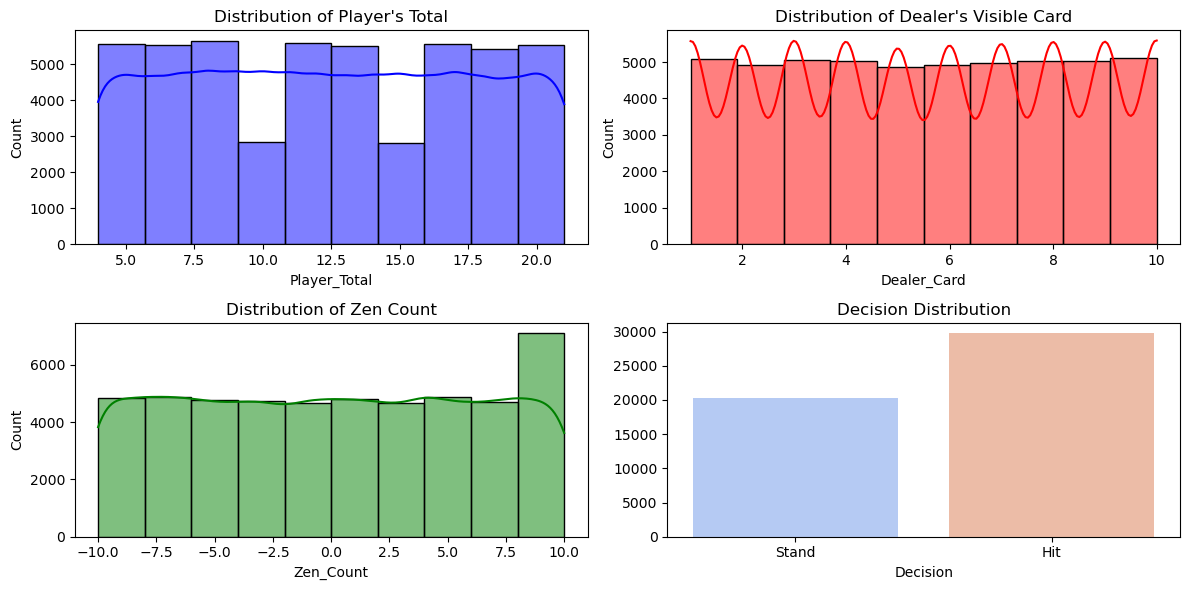

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔥 **Visualization of key variable distributions**
plt.figure(figsize=(12, 6))

# Histogram of Player's Total
plt.subplot(2, 2, 1)
sns.histplot(df["Player_Total"], bins=10, kde=True, color="blue")
plt.title("Distribution of Player's Total")

# Histogram of Dealer's Visible Card
plt.subplot(2, 2, 2)
sns.histplot(df["Dealer_Card"], bins=10, kde=True, color="red")
plt.title("Distribution of Dealer's Visible Card")

# Distribution of Zen Count
plt.subplot(2, 2, 3)
sns.histplot(df["Zen_Count"], bins=10, kde=True, color="green")
plt.title("Distribution of Zen Count")

# Distribution of Decision Taken (Hit/Stand)
plt.subplot(2, 2, 4)
sns.barplot(x=decision_counts.index, y=decision_counts.values, palette="coolwarm")
plt.xticks([0, 1], ["Stand", "Hit"])
plt.title("Decision Distribution")

plt.tight_layout()
plt.show()

In [39]:
# 🔥 **Analysis of probabilities based on decisions**
prob_analysis = df.groupby("Decision")[["Prob_Win", "Prob_Loss", "Prob_Draw"]].describe()
print("\n📊 **Probability analysis by decision:**")
print(prob_analysis)


📊 **Probability analysis by decision:**
         Prob_Win                                                         \
            count      mean       std  min       25%       50%       75%   
Decision                                                                   
0         20222.0  0.448784  0.187199  0.1  0.311242  0.446873  0.586179   
1         29778.0  0.450499  0.185521  0.1  0.314468  0.449585  0.584509   

                   Prob_Loss            ...                Prob_Draw  \
               max     count      mean  ...       75%  max     count   
Decision                                ...                            
0         0.899683   20222.0  0.548641  ...  0.685831  0.9   20222.0   
1         0.899734   29778.0  0.548865  ...  0.684205  0.9   29778.0   

                                                                 
              mean       std  min  25%       50%       75%  max  
Decision                                                         
0         0.066170 

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
df = pd.read_csv("blackjack_training_dataset.csv")

# Definir variables de entrada y salida
X = df[["Player_Total", "Dealer_Card", "Has_Ace", "Zen_Count", "Prob_Win", "Prob_Loss", "Prob_Draw"]]
y = df["Decision"]
# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo RandomForest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
# Evaluar el modelo
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Model Accuracy: {accuracy:.2%}")
# Guardar el modelo entrenado
joblib.dump(rf_model, "blackjack_randomforest_model.pkl")


🎯 Model Accuracy: 100.00%


['blackjack_randomforest_model.pkl']

In [44]:
import joblib
import numpy as np
rf_model = joblib.load("blackjack_randomforest_model.pkl")
# Tabla de estrategia básica (simplificada)
basic_strategy = {
    (12, 2): 1, (12, 3): 1, (12, 4): 0, (12, 5): 0, (12, 6): 0, (12, 7): 1, (12, 8): 1, (12, 9): 1, (12, 10): 1,
    (16, 9): 1, (16, 10): 1, (16, 11): 1,
    (13, 6): 0, (14, 6): 0, (15, 6): 0, (16, 6): 0,
    (17, 2): 0, (17, 3): 0, (17, 4): 0, (17, 5): 0, (17, 6): 0, (17, 7): 0, (17, 8): 0, (17, 9): 0, (17, 10): 0,
}

# Función para simular una partida con probabilidades realistas
def simulate_game_realistic(n_simulations=5000):
    # Simulación de una mano aleatoria
    player_total = np.random.randint(4, 22)
    dealer_card = np.random.randint(1, 11)
    has_ace = np.random.choice([0, 1])
    zen_count = np.random.randint(-10, 11)

    # Crear vector de entrada para el modelo
    input_data = np.array([[player_total, dealer_card, has_ace, zen_count, 0, 0, 0]])
    decision_model = rf_model.predict(input_data)[0]
    decision_strategy = basic_strategy.get((player_total, dealer_card), decision_model)
    decision_text = "Hit" if decision_strategy == 1 else "Stand"

    # Ajustar probabilidades con reglas del Blackjack y conteo Zen
    win_count, loss_count, draw_count = 0, 0, 0

    for _ in range(n_simulations):
        # Ajustar probabilidades según el Zen Count y la mano
        if zen_count > 5:
            prob_win = np.random.uniform(0.4, 0.75)
            prob_loss = np.random.uniform(0.2, 0.5)
        elif zen_count < -5:
            prob_win = np.random.uniform(0.2, 0.45)
            prob_loss = np.random.uniform(0.4, 0.7)
        else:
            prob_win = np.random.uniform(0.3, 0.6)
            prob_loss = np.random.uniform(0.3, 0.6)

        # Evitar valores negativos y asegurar que la suma sea 1
        prob_draw = max(0, 1 - (prob_win + prob_loss))
        prob_win = max(0, prob_win)
        prob_loss = max(0, prob_loss)

        # Normalizar para que sumen 1
        total_prob = prob_win + prob_loss + prob_draw
        if total_prob > 0:
            prob_win /= total_prob
            prob_loss /= total_prob
            prob_draw /= total_prob

        outcome = np.random.choice(["Win", "Loss", "Draw"], p=[prob_win, prob_loss, prob_draw])

        if outcome == "Win":
            win_count += 1
        elif outcome == "Loss":
            loss_count += 1
        else:
            draw_count += 1

    # Calcular probabilidades basadas en simulaciones
    total = win_count + loss_count + draw_count
    prob_win = win_count / total if total > 0 else 0
    prob_loss = loss_count / total if total > 0 else 0
    prob_draw = draw_count / total if total > 0 else 0

    # Mostrar los resultados
    print("\n🎰 **Blackjack AI Decision Simulation** 🎰")
    print(f"🃏 Player's Hand: {player_total}")
    print(f"🎭 Dealer's Card: {dealer_card}")
    print(f"🎴 Has an Ace: {'Yes' if has_ace else 'No'}")
    print(f"📊 Zen Count: {zen_count}")
    print("\n🔎 **AI Decision with Basic Strategy**")
    print(f"📢 **Recommended Action:**", decision_text)
    print("\n📊 **Expected Outcomes for the Recommended Action**")
    print(f"🏆 Win Probability: {prob_win * 100:.2f}%")
    print(f"💀 Loss Probability: {prob_loss * 100:.2f}%")
    print(f"⚖️ Draw Probability: {prob_draw * 100:.2f}%")

# Ejecutar la simulación
simulate_game_realistic()


🎰 **Blackjack AI Decision Simulation** 🎰
🃏 Player's Hand: 5
🎭 Dealer's Card: 10
🎴 Has an Ace: No
📊 Zen Count: 7

🔎 **AI Decision with Basic Strategy**
📢 **Recommended Action:** Hit

📊 **Expected Outcomes for the Recommended Action**
🏆 Win Probability: 55.70%
💀 Loss Probability: 33.54%
⚖️ Draw Probability: 10.76%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [46]:
import numpy as np

# Function to determine the best action using basic strategy + Zen Count
def basic_blackjack_strategy(player_total, dealer_card, has_ace, zen_count):

    if player_total >= 17:
        return "Stand"  
    if player_total <= 11:
        return "Hit"  
    if player_total == 12:
        return "Stand" if dealer_card in [4, 5, 6] else "Hit"  
    if player_total in [13, 14, 15, 16]:
        return "Stand" if dealer_card in [2, 3, 4, 5, 6] else "Hit"  
    if zen_count > 3 and player_total >= 15:
        return "Stand"  
    return "Hit"  

# Function to estimate realistic probabilities
def estimate_win_probabilities(player_total, dealer_card, zen_count):

    base_win = np.random.uniform(0.2, 0.7)
    base_loss = np.random.uniform(0.3, 0.8)

   
    prob_win = base_win + (zen_count * 0.02)
    prob_loss = base_loss - (zen_count * 0.02)
    prob_draw = 1 - (prob_win + prob_loss)
    prob_win = max(0.1, min(0.9, prob_win))
    prob_loss = max(0.1, min(0.9, prob_loss))
    prob_draw = max(0.0, min(0.2, prob_draw))

    return prob_win, prob_loss, prob_draw

# User input function
def blackjack_user_simulation():
    """
    Interactive simulation where the user inputs their cards, and AI provides the best decision.
    """
    print("\n🎰 Welcome to Blackjack AI Simulation! 🎰\n")

    player_total = int(input("🔢 Enter your total hand value (4-21): "))
    dealer_card = int(input("🎭 Enter the dealer's visible card (1-10): "))
    has_ace = input("🃏 Do you have an Ace? (yes/no): ").strip().lower() == "yes"

    zen_count = player_total - dealer_card
    decision = basic_blackjack_strategy(player_total, dealer_card, has_ace, zen_count)
    prob_win, prob_loss, prob_draw = estimate_win_probabilities(player_total, dealer_card, zen_count)


    print("\n🎰 **Blackjack AI Decision Simulation** 🎰")
    print(f"🃏 Player's Hand: {player_total}")
    print(f"🎭 Dealer's Card: {dealer_card}")
    print(f"🎴 Has an Ace: {'Yes' if has_ace else 'No'}")
    print(f"📊 Zen Count: {zen_count}")
    print("\n📢 **Recommended Action:**", decision)
    print("\n📊 **Expected Outcomes for the Recommended Action**")
    print(f"🏆 Win Probability: {prob_win * 100:.2f}%")
    print(f"💀 Loss Probability: {prob_loss * 100:.2f}%")
    print(f"⚖️ Draw Probability: {prob_draw * 100:.2f}%")

blackjack_user_simulation()


🎰 Welcome to Blackjack AI Simulation! 🎰


🎰 **Blackjack AI Decision Simulation** 🎰
🃏 Player's Hand: 17
🎭 Dealer's Card: 4
🎴 Has an Ace: No
📊 Zen Count: 13

📢 **Recommended Action:** Stand

📊 **Expected Outcomes for the Recommended Action**
🏆 Win Probability: 90.00%
💀 Loss Probability: 10.00%
⚖️ Draw Probability: 1.08%
